In [1]:
# load training data
import pandas as pd
print 'Loading trainig data'
train_data = pd.read_csv('l_train.csv')

Loading trainig data


In [4]:
from sklearn.model_selection import train_test_split
# asign sets and make splits
y       = pd.DataFrame(train_data['Label'])
X       = train_data.iloc[:,:32]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# change strings to integers
y_train['Label'] = y_train['Label'].map({'b':0, 's':1})
y_test['Label'] = y_test['Label'].map({'b':0, 's':1})
# put weights on separate variables
w_train = pd.DataFrame(X_train['Weight'])
w_test  = pd.DataFrame(X_test['Weight'])
# conserve id's in case we use them in the future
id_train = pd.DataFrame(X_train['EventId'])
id_test  = pd.DataFrame(X_test['EventId'])
# leave only the feature vector on the X's
X_train = X_train.iloc[:,1:31]
X_test  = X_test.iloc[:,1:31]

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
X_test.head(5)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
38683,136.372,32.142,95.158,24.012,-999.000,-999.000,-999.000,2.650,24.012,81.013,...,1.655,171.588,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
64939,123.147,73.967,73.065,1.951,-999.000,-999.000,-999.000,3.181,1.951,73.968,...,-2.199,41.860,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
3954,114.196,77.282,84.580,1.398,-999.000,-999.000,-999.000,2.808,1.398,86.994,...,-0.552,71.651,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
120374,113.938,37.713,78.068,73.541,1.506,83.664,0.344,2.062,2.179,176.908,...,-0.516,224.587,2,45.739,-1.707,2.192,38.358,-0.202,-3.017,84.097
172861,-999.000,82.024,55.707,15.350,-999.000,-999.000,-999.000,1.943,15.350,62.787,...,-0.157,98.964,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000


In [16]:
# explore data types of each feature
import numpy as np
columns =  X_train.columns
for column in columns:
    vals = [type(val) for val in X_train[column].unique()]
    print 'feature: {}, types: {}'.format(column, np.unique(vals))

feature: DER_mass_MMC, types: [<type 'numpy.float64'>]
feature: DER_mass_transverse_met_lep, types: [<type 'numpy.float64'>]
feature: DER_mass_vis, types: [<type 'numpy.float64'>]
feature: DER_pt_h, types: [<type 'numpy.float64'>]
feature: DER_deltaeta_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_mass_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_prodeta_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_deltar_tau_lep, types: [<type 'numpy.float64'>]
feature: DER_pt_tot, types: [<type 'numpy.float64'>]
feature: DER_sum_pt, types: [<type 'numpy.float64'>]
feature: DER_pt_ratio_lep_tau, types: [<type 'numpy.float64'>]
feature: DER_met_phi_centrality, types: [<type 'numpy.float64'>]
feature: DER_lep_eta_centrality, types: [<type 'numpy.float64'>]
feature: PRI_tau_pt, types: [<type 'numpy.float64'>]
feature: PRI_tau_eta, types: [<type 'numpy.float64'>]
feature: PRI_tau_phi, types: [<type 'numpy.float64'>]
feature: PRI_lep_pt, types: [<type 'numpy.float64'>]
feature: PR

In [23]:
# check max and min values of each feature to see which columns have undefined values
print 'columns with undefined values:'
for column in columns:
    lst = [x for x in X_train[column].unique()]
    lst.sort()
    if lst[0] == -999.0:
        print column
    #print 'col: {} with max: {} and min: {}'.format(column, lst[-1], lst[0])

columns with undefined values:
DER_mass_MMC
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_lep_eta_centrality
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi


/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-999.0, right=-999.0
  'left=%s, right=%s') % (left, right))
/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-999.0, top=-999.0
  'bottom=%s, top=%s') % (bottom, top))
/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'botto

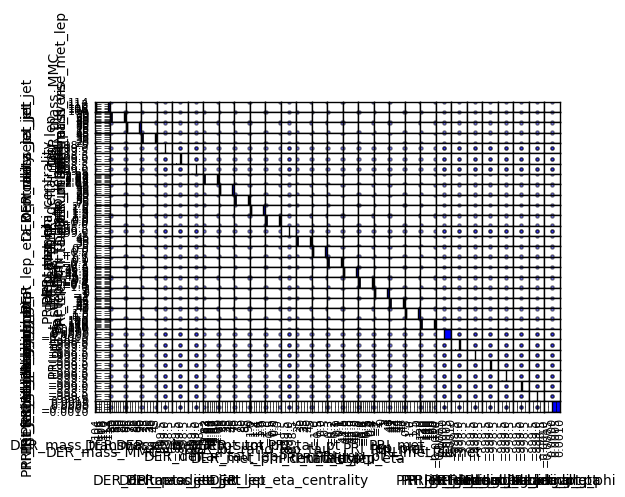

In [50]:
'''
import matplotlib.pyplot as plt

plt.scatter(X_train['DER_mass_MMC'],y_train['Label'], l=['event','back'], c=['r','b'])
#plt.scatter(X_train['DER_mass_MMC'], X_train['DER_deltaeta_jet_jet'])
plt.legend()
plt.show()
#pd.scatter_matrix(X_train)
'''
import numpy as np
import matplotlib.pyplot as plt

names = set(y_train['Label'])

x, y = X_train['PRI_tau_pt'],  X_train['PRI_jet_subleading_eta']
'''
for name in names:
    cond = y_train['Label'] == name
    plt.plot(x[cond], y[cond], linestyle='none', marker='o', label=name)
'''
#plt.legend(numpoints=1)
pd.scatter_matrix(X_train[:2])
plt.show()

In [54]:
# train the model
from sklearn.ensemble import GradientBoostingClassifier as GBC
clf = GBC(n_estimators=50, max_depth=5, min_samples_leaf=200, max_features=10, verbose=1)
clf.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2188            1.21m
         2           1.1609            1.23m
         3           1.1203            1.20m
         4           1.0791            1.06m
         5           1.0425           57.93s
         6           1.0132           54.17s
         7           0.9844           51.47s
         8           0.9614           48.50s
         9           0.9445           46.32s
        10           0.9246           44.31s
        20           0.8192           28.45s
        30           0.7762           17.87s
        40           0.7537            8.64s
        50           0.7399            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=10, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=200,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False)

In [57]:
# predictions from training set
y_train_pred = clf.predict(X_train)
# probabilities from train/test
prob_train_pred = clf.predict_proba(X_train)
prob_test_pred  = clf.predict_proba(X_test)
# get second column (first column has inverse probabilities)
prob_train_pred = prob_train_pred[:,1]
prob_test_pred  = prob_test_pred[:,1]

array([ 0.76656025,  0.08582114,  0.71906192, ...,  0.06783308,
        0.07816643,  0.15369901])

In [97]:
import numpy as np
# the 85th percentile is the value below which 85% of the observations may be found (wikipedia)
threshold = np.percentile(prob_train_pred, 85)
# the threshold displayed 0.78445009849346203
y_train_pred = prob_train_pred > threshold 
y_test_pred  = prob_test_pred  > threshold
print y_train_pred
print y_test_pred

[False False False ..., False False False]
[False False False ..., False False False]


In [189]:
# compute true positive/negatives and scale the weights according to the train/test split
TP_train = w_train.values * (y_train == 1.0)*(1.0/0.67)
TN_train = w_train.values * (y_train == 0.0)*(1.0/0.67)
TP_test  = w_test.values  * (y_test  == 1.0)*(1.0/0.33)
TN_test  = w_test.values  * (y_test  == 0.0)*(1.0/0.33)
TP_train.values.flatten()

array([ 0.0278151 ,  0.        ,  0.00224284, ...,  0.        ,
        0.        ,  0.        ])

In [190]:
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [191]:
# compute s's and b's to be used in the AMS calculation accordin to the documentation
# ussage of the indicator funcion
s_train = sum(TP_train.values.flatten() * (y_train_pred == 1.0))
b_train = sum(TN_train.values.flatten() * (y_train_pred == 1.0))
s_test = sum(TP_test.values.flatten()   * (y_test_pred  == 1.0))
b_test = sum(TN_test.values.flatten()   * (y_test_pred  == 1.0))

In [192]:
# calculate the AMS score
import math
def AMS_score(s,b): return  math.sqrt (2.*( (s + b + 10.)*math.log(1.+s/(b+10.))-s))
print 'AMS score with training sample: {}'.format(AMS_score(s_train,b_train))
print 'AMS score with testing sample: {}:'.format(AMS_score(s_test,b_test))

AMS score with training sample: 3.49929238197
AMS score with testing sample: 3.42973369564:


In [121]:
# load testing data to perform the submission predictions
test_data = pd.read_csv('test.csv')

In [144]:
# store the feature columns and make the predictions
X_t = test_data.iloc[:,1:31]
y_prob_t = clf.predict_proba(X_t)
y_prob_t = y_prob_t[:,1]

In [176]:
# get probabilities into a dataframe, stablish values above the threshold and set id's
probs = pd.DataFrame(y_prob_t,columns=['prob'])
y_t_cleaned = y_prob_t > threshold
labels = pd.DataFrame(y_t_cleaned, columns=['label'])
submission = pd.DataFrame([test_data['EventId'], probs['prob'], labels['label']]).T

In [181]:
# we first sort the data based on the probabilities to later assign the rank numeration incrementally
sort_submission = submission.sort(['prob'],ascending=True)
sort_submission.head()

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,EventId,prob,label
122596,472596.0,0.016690,0.0
370548,720548.0,0.017145,0.0
380878,730878.0,0.017216,0.0
103392,453392.0,0.017227,0.0
96821,446821.0,0.017293,0.0


In [182]:
# assign rank numeration incrementally
ranks = [i+1 for i in range(0, X_t.shape[0])]
sort_submission['prob']    = ranks
# return to original labels
sort_submission['label']   = sort_submission['label'].map({1:'s', 0:'b'})
# return id's to original format
sort_submission['EventId'] = sort_submission['EventId'].astype(int)
sort_submission.head()

,EventId,prob,label
122596,472596,1,b
370548,720548,2,b
380878,730878,3,b
103392,453392,4,b
96821,446821,5,b


In [183]:
# set columns correct naming
id_sort = sort_submission.sort(['EventId'], ascending=True)
id_sort.columns=['EventId','RankOrder','Class']
id_sort.tail()

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,EventId,RankOrder,Class
549995,899995,159564,b
549996,899996,375404,b
549997,899997,124026,b
549998,899998,383427,b
549999,899999,287662,b


In [184]:
# generate submission file
'''submission = pd.DataFrame({
        "EventId": id_sort['EventId'],
        "RankOrder":id_sort['RankOrder'],
        "Class": id_sort['Class']
    })
'''
# this submission gets to place 882/1785
id_sort.to_csv('higgsSubmission1.csv', index=False)